In [3]:


import numpy as np 
import pandas as pd 



import os
#print(os.listdir("/content/drive/MyDrive/data_for_project/BLUR_DATASET"))
import matplotlib.pyplot as plt
import cv2
import sklearn
import seaborn as sb

from skimage.color import rgb2gray
from skimage.filters import laplace, sobel, roberts


In [4]:
print('Sobel operator:\n',np.matrix([[1,0,-1],[2,0,-2],[1,0,-1]]))
print('Laplacian operator:\n',np.matrix([[0,-1,0],[-1,4,-1],[0,-1,0]]))

Sobel operator:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Laplacian operator:
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [ ]:
s_path ='/content/drive/MyDrive/data_for_project/BLUR_DATASET/nblur/'
mot_path ='/content/drive/MyDrive/data_for_project/BLUR_DATASET/Blur/'

In [11]:
s_path ='/Users/arunchilukuri/Desktop/tensorflow-test/BLUR_DATASET/nblur/'
mot_path ='/Users/arunchilukuri/Desktop/tensorflow-test/BLUR_DATASET/Blur/'

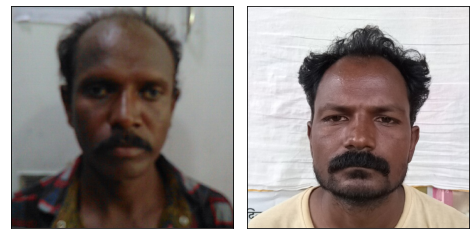

In [ ]:
img_paths = ['/content/drive/MyDrive/data_for_project/BLUR_DATASET/Blur/002cca4c2dcacf66b09ced0464f55e3b_image2.jpg','/content/drive/MyDrive/data_for_project/BLUR_DATASET/Nonblur/006971cf73345b7090051d1a1678d720_image2.jpg']
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=plt.imread(path[i])
        plt.subplot(1, 3, i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

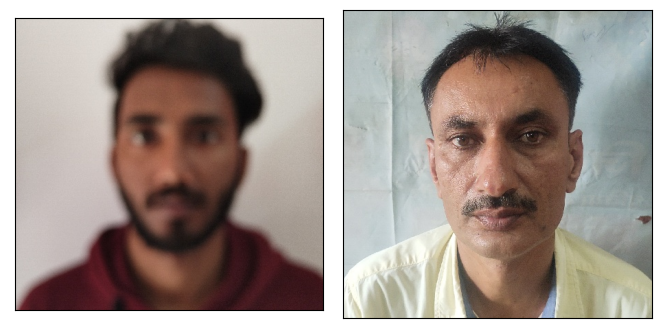

In [6]:
img_paths = ['/Users/arunchilukuri/Desktop/tensorflow-test/BLUR_DATASET/Blur/0a43e1872c3d9438cb2065308509cf16_image2.jpg','/Users/arunchilukuri/Desktop/tensorflow-test/BLUR_DATASET/nblur/0a7e769c8f32e4310c06700f5825bcaa_image2.jpg']
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=plt.imread(path[i])
        plt.subplot(1, 3, i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

lap

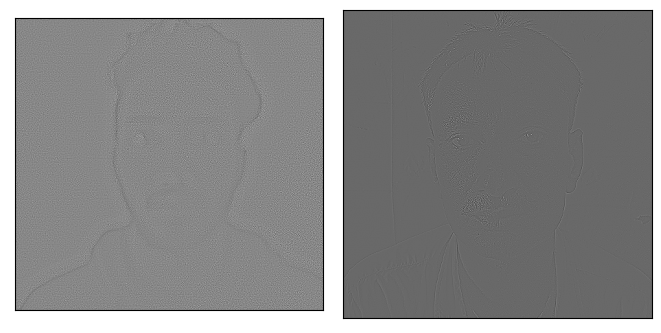

In [7]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = laplace(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([]) 
    plt.tight_layout()
    plt.show()
show_images(img_paths)

sobel

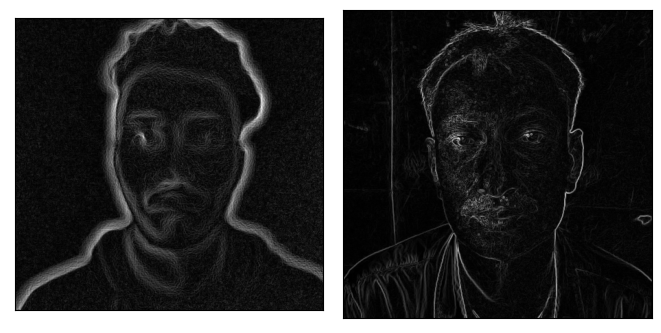

In [8]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = sobel(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

roberts

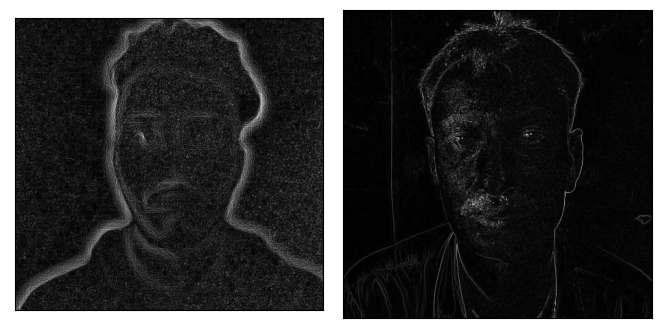

In [9]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = roberts(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

In [12]:
sharp_images = os.listdir(s_path)
motion_blurred = os.listdir(mot_path)

In [13]:
def get_data(path,images):
    features=[]
    for img in images:
        feature=[]
        image_gray = plt.imread(path+img,0)
        lap_feat = laplace(image_gray)
        sob_feat = sobel(image_gray)
        #rob_feat = roberts(image_gray)
        feature.extend([img,lap_feat.mean(),lap_feat.var(),np.amax(lap_feat),
                        sob_feat.mean(),sob_feat.var(),np.max(sob_feat)])
        
        #,rob_feat.mean(),rob_feat.var(),np.max(rob_feat)
        
        features.append(feature)
    return features

In [14]:
def get_data1(path):
    features=[]
    
    feature=[]
    image_gray = cv2.imread(path,0)
    lap_feat = laplace(image_gray)
    sob_feat = sobel(image_gray)
    rob_feat = roberts(image_gray)
    feature.extend(["feats",lap_feat.mean(),lap_feat.var(),np.amax(lap_feat),
                        sob_feat.mean(),sob_feat.var(),np.max(sob_feat),
                        rob_feat.mean(),rob_feat.var(),np.max(rob_feat)])
        
    features.append(feature)
    return features

In [15]:
sharp_features1 = get_data1(img_paths[1])

motion_blur_features1 = get_data1(img_paths[0])

In [16]:
sharp_df = pd.DataFrame(sharp_features1)
sharp_df.drop(0,axis=1,inplace=True)
sharp_df.head()

,1,2,3,4,5,6,7,8,9
0,-2.247859e-18,0.014001,2.72549,0.024232,0.001113,0.455903,0.027948,0.0015,0.713866


In [17]:
motion_df = pd.DataFrame(motion_blur_features1)
motion_df.drop(0,axis=1,inplace=True)
motion_df.head()

,1,2,3,4,5,6,7,8,9
0,8.127123e-20,0.001431,0.27451,0.013546,0.00021,0.143248,0.014739,0.000129,0.127827


In [18]:

sharp_features = get_data(s_path,sharp_images)

motion_blur_features = get_data(mot_path,motion_blurred)

In [19]:
sharp_df = pd.DataFrame(sharp_features)
sharp_df.drop(0,axis=1,inplace=True)
sharp_df.head()
sharp_df.describe()

,1,2,3,4,5,6
count,2.967000e+03,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
mean,-1.169209e-17,0.022303,1.774599,0.050923,0.002990,0.453604
std,2.985235e-17,0.018062,0.589726,0.015881,0.001911,0.080551
min,-1.349468e-16,0.001436,0.200000,0.016534,0.000225,0.148964
25%,-2.829671e-17,0.010260,1.384314,0.040191,0.001800,0.401528
50%,-1.028094e-17,0.016934,1.768627,0.048581,0.002528,0.458364
75%,6.222366e-18,0.028919,2.150980,0.059220,0.003532,0.513224
max,1.105844e-16,0.141100,3.921569,0.165838,0.015971,0.632268


In [20]:
motion_df = pd.DataFrame(motion_blur_features)
motion_df.drop(0,axis=1,inplace=True)
motion_df.head()
motion_df.describe()


,1,2,3,4,5,6
count,2.967000e+03,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
mean,-1.341171e-17,0.010723,0.729798,0.044785,0.002159,0.286434
std,2.387179e-17,0.012879,0.432786,0.020461,0.002366,0.115262
min,-1.440132e-16,0.000261,0.101961,0.006256,0.000022,0.053285
25%,-2.393750e-17,0.003839,0.411765,0.031067,0.000817,0.193736
50%,-1.135991e-17,0.006893,0.619608,0.041243,0.001564,0.272877
75%,-2.206421e-18,0.013009,0.929412,0.055052,0.002695,0.368627
max,1.235767e-16,0.200023,3.352941,0.221223,0.032446,0.601879


In [21]:
label = ['Sharp_images','Mtion_blurred_images']
no_images=[len(sharp_features),len(motion_blur_features)]

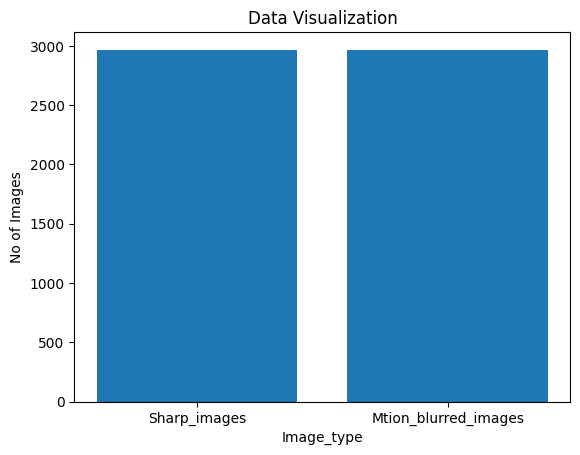

In [22]:
def plot_bar_x():
    # this is for plotting only
    index = np.arange(len(label))
    plt.bar(index, no_images)
    plt.xlabel('Image_type', fontsize=10)
    plt.ylabel('No of Images', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=0)
    plt.title('Data Visualization')
    plt.show()
plot_bar_x()

In [23]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(motion_df)
all_features = np.array(images)
y_f = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((motion_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

svm_model = svm.SVC(C=100,kernel='rbf')
#svm_model = svm.SVC(C=100,kernel='linear')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))


/var/folders/29/4bxkgz7n1_x0nz2sdr6w7j7w0000gn/T/ipykernel_31789/4108324222.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images = images.append(sharp_df)
/var/folders/29/4bxkgz7n1_x0nz2sdr6w7j7w0000gn/T/ipykernel_31789/4108324222.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images = images.append(motion_df)


Accuracy: 0.8662582950484942
Confusion matrix:
 [[854 125]
 [137 843]]
F1_score: 0.8655030800821355
Classification_report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       979
         1.0       0.87      0.86      0.87       980

    accuracy                           0.87      1959
   macro avg       0.87      0.87      0.87      1959
weighted avg       0.87      0.87      0.87      1959



In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(motion_df)
all_features = np.array(images)
y_f = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((motion_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

svm_model = svm.SVC(C=100,kernel='rbf')
#svm_model = svm.SVC(C=100,kernel='linear')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))


Accuracy: 0.8608278344331134
Confusion matrix:
 [[869 110]
 [122 566]]
F1_score: 0.8299120234604104
Classification_report:
               precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       979
         1.0       0.84      0.82      0.83       688

    accuracy                           0.86      1667
   macro avg       0.86      0.86      0.86      1667
weighted avg       0.86      0.86      0.86      1667



In [ ]:
#from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
from sklearn.tree import DecisionTreeRegressor
images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(motion_df)
all_features = np.array(images)
y_f = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((motion_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

tree_model = DecisionTreeRegressor(random_state = 0)
#svm_model = svm.SVC(C=100,kernel='linear')
tree_model.fit(x_train,y_train)
pred =tree_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))


Accuracy: 0.8242351529694061
Confusion matrix:
 [[851 128]
 [165 523]]
F1_score: 0.7811799850634802
Classification_report:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       979
         1.0       0.80      0.76      0.78       688

    accuracy                           0.82      1667
   macro avg       0.82      0.81      0.82      1667
weighted avg       0.82      0.82      0.82      1667



In [24]:
#from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
from sklearn.tree import DecisionTreeRegressor
images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(motion_df)
all_features = np.array(images)
y_f = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((motion_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

tree_model = DecisionTreeRegressor(random_state = 0)
#svm_model = svm.SVC(C=100,kernel='linear')
tree_model.fit(x_train,y_train)
pred =tree_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))


Accuracy: 0.8101071975497703
Confusion matrix:
 [[791 189]
 [183 796]]
F1_score: 0.8105906313645621
Classification_report:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       980
         1.0       0.81      0.81      0.81       979

    accuracy                           0.81      1959
   macro avg       0.81      0.81      0.81      1959
weighted avg       0.81      0.81      0.81      1959



/var/folders/29/4bxkgz7n1_x0nz2sdr6w7j7w0000gn/T/ipykernel_31789/1664625474.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images = images.append(sharp_df)
/var/folders/29/4bxkgz7n1_x0nz2sdr6w7j7w0000gn/T/ipykernel_31789/1664625474.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images = images.append(motion_df)
